In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/movies.csv')

In [ ]:
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


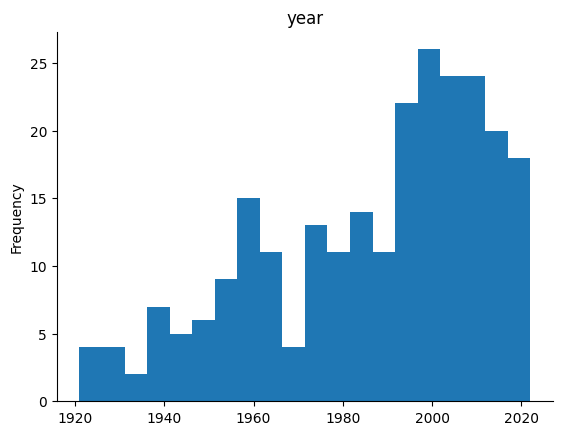

In [ ]:
# @title year

from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

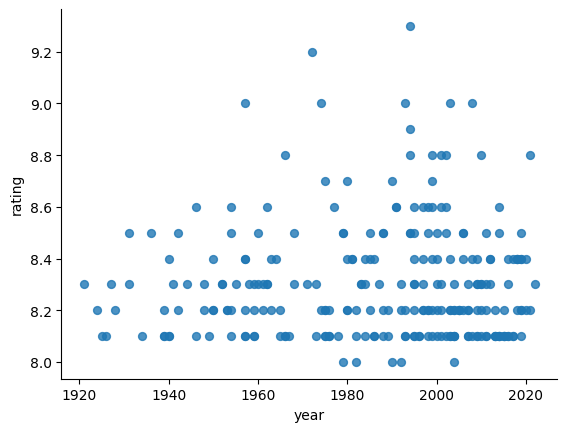

In [ ]:
# @title year vs rating

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(250, 13)

In [ ]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 250


In [ ]:
df.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [ ]:
df.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

In [ ]:
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

rank - 0
name - 0
year - 0
rating - 0
genre - 0
certificate - 0
run_time - 0
tagline - 0
budget - 0
box_office - 0
casts - 0
directors - 0
writers - 0


In [ ]:
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [ ]:
df['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ])

<Axes: xlabel='year', ylabel='rating'>

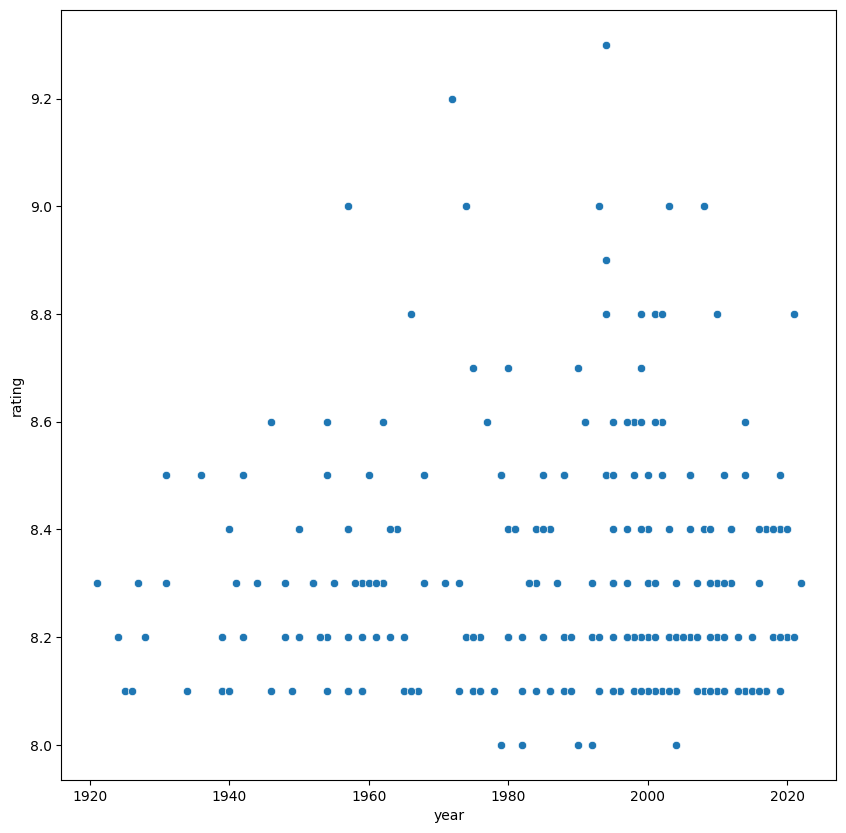

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='year', y='rating', data=df)

In [ ]:
real_gen = ""
for i in df['genre']:
    real_gen = real_gen+","+i
all_gen = real_gen.split(',')[1:]
unique_genres = list(set(all_gen))

In [ ]:
data = []
for i in unique_genres:
    c = 0
    for j in df['genre']:
        if i in j:
            c+=1
    data.append([i, c])

In [ ]:
gen_df = pd.DataFrame(data, columns=['Genre', 'Freq'])
gen_df.sort_values(by = 'Freq', ascending = False, inplace = True)
gen_df = gen_df.head(5)

<ipython-input-17-953e0d356710>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = gen_df, x = 'Genre', y = 'Freq', palette='Paired')


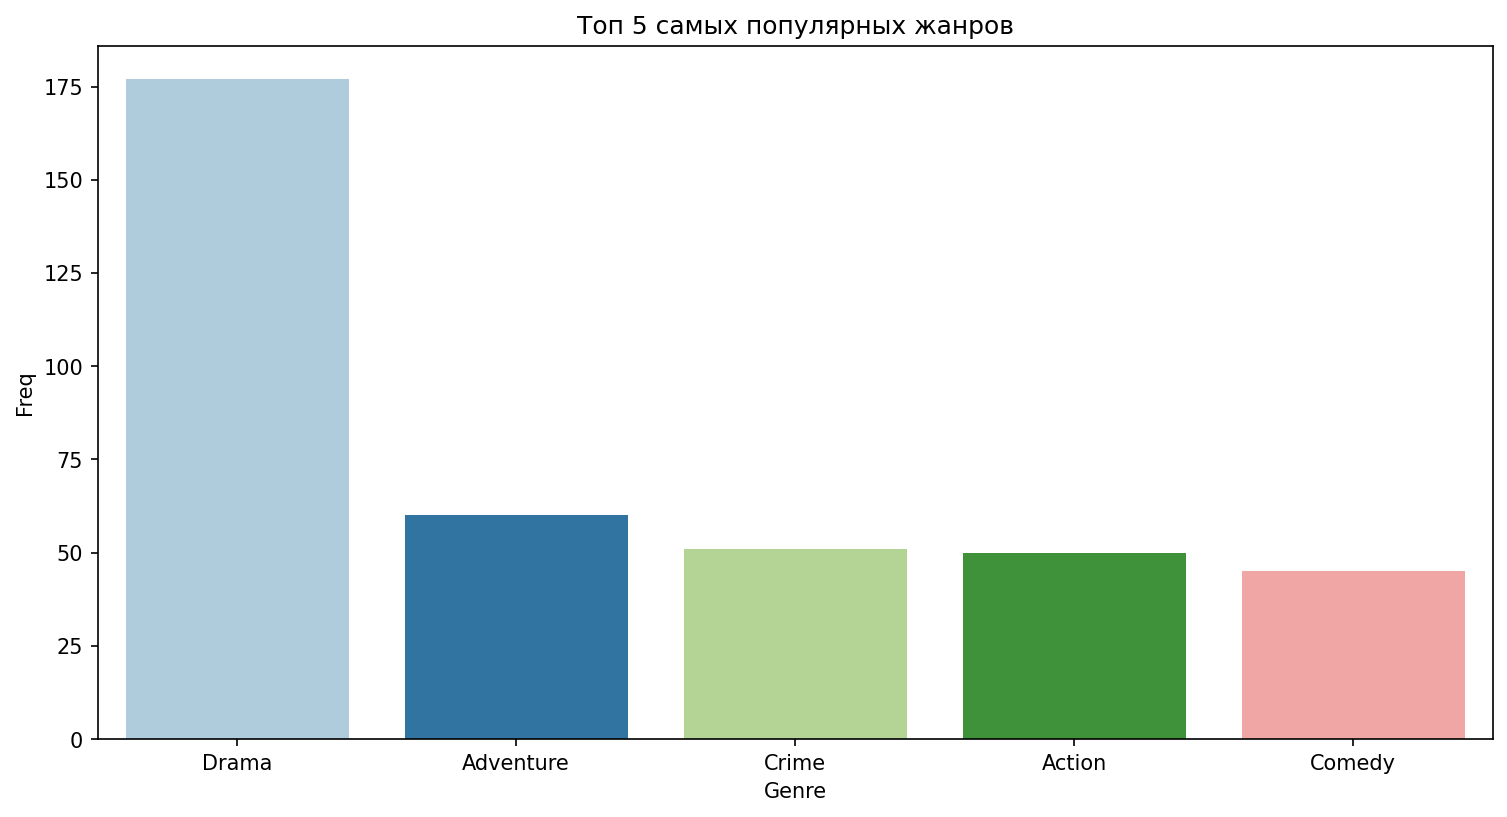

In [ ]:
plt.figure(figsize=(12,6),dpi = 150)
sns.barplot(data = gen_df, x = 'Genre', y = 'Freq', palette='Paired')
plt.title('Топ 5 самых популярных жанров')
plt.show()

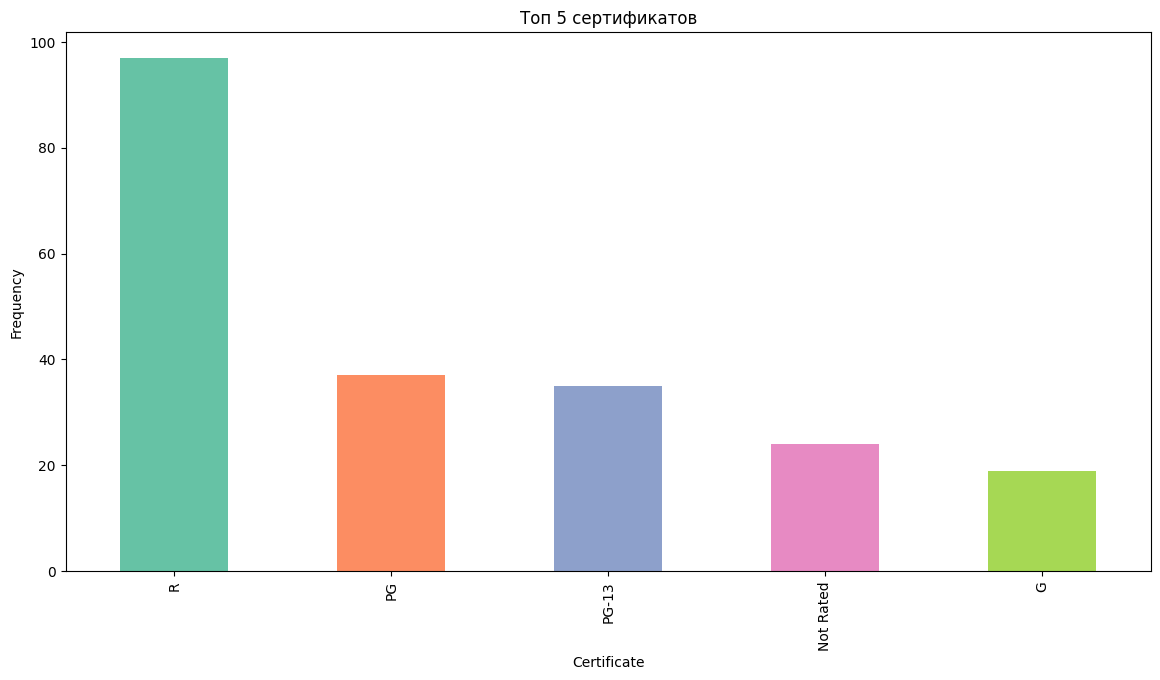

In [ ]:
plt.figure(figsize=(14,7))
df.groupby('certificate').size().sort_values(ascending=False).head(5).plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel('Certificate')
plt.ylabel('Frequency')
plt.title("Топ 5 сертификатов")
plt.show()

In [ ]:
df['year'].sort_values()

127    1921
194    1924
176    1925
186    1926
114    1927
       ... 
107    2020
129    2020
233    2021
149    2021
105    2022
Name: year, Length: 250, dtype: int64

In [ ]:
_21to40 = 0
_41to60 = 0
_61to80 = 0
_81to00 = 0
_01to22 = 0

for i in df['year']:
    if i>1920 and i<=1940:
        _21to40+=1
    elif i>1940 and i<=1960:
        _41to60+=1
    elif i>1960 and i<=1980:
        _61to80+=1
    elif i>1980 and i<=2000:
        _81to00+=1
    else:
        _01to22+=1

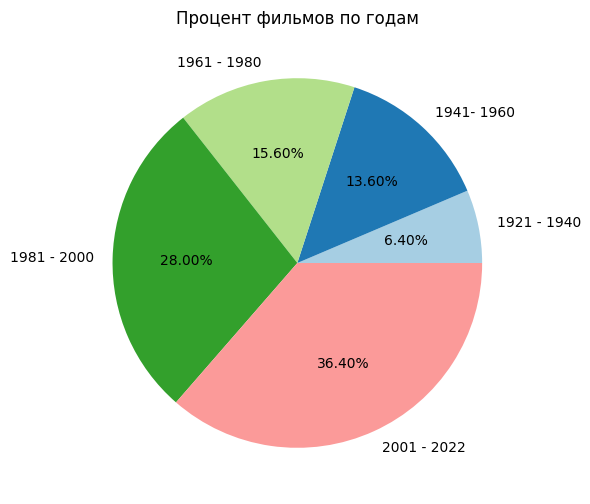

In [ ]:
data = [_21to40, _41to60, _61to80, _81to00, _01to22]
label = ['1921 - 1940', '1941- 1960', '1961 - 1980', '1981 - 2000', '2001 - 2022']
plt.figure(figsize=(12,6))
plt.pie(data,labels=label,colors=sns.color_palette('Paired'),autopct='%.2f%%')
plt.title("Процент фильмов по годам")
plt.show()

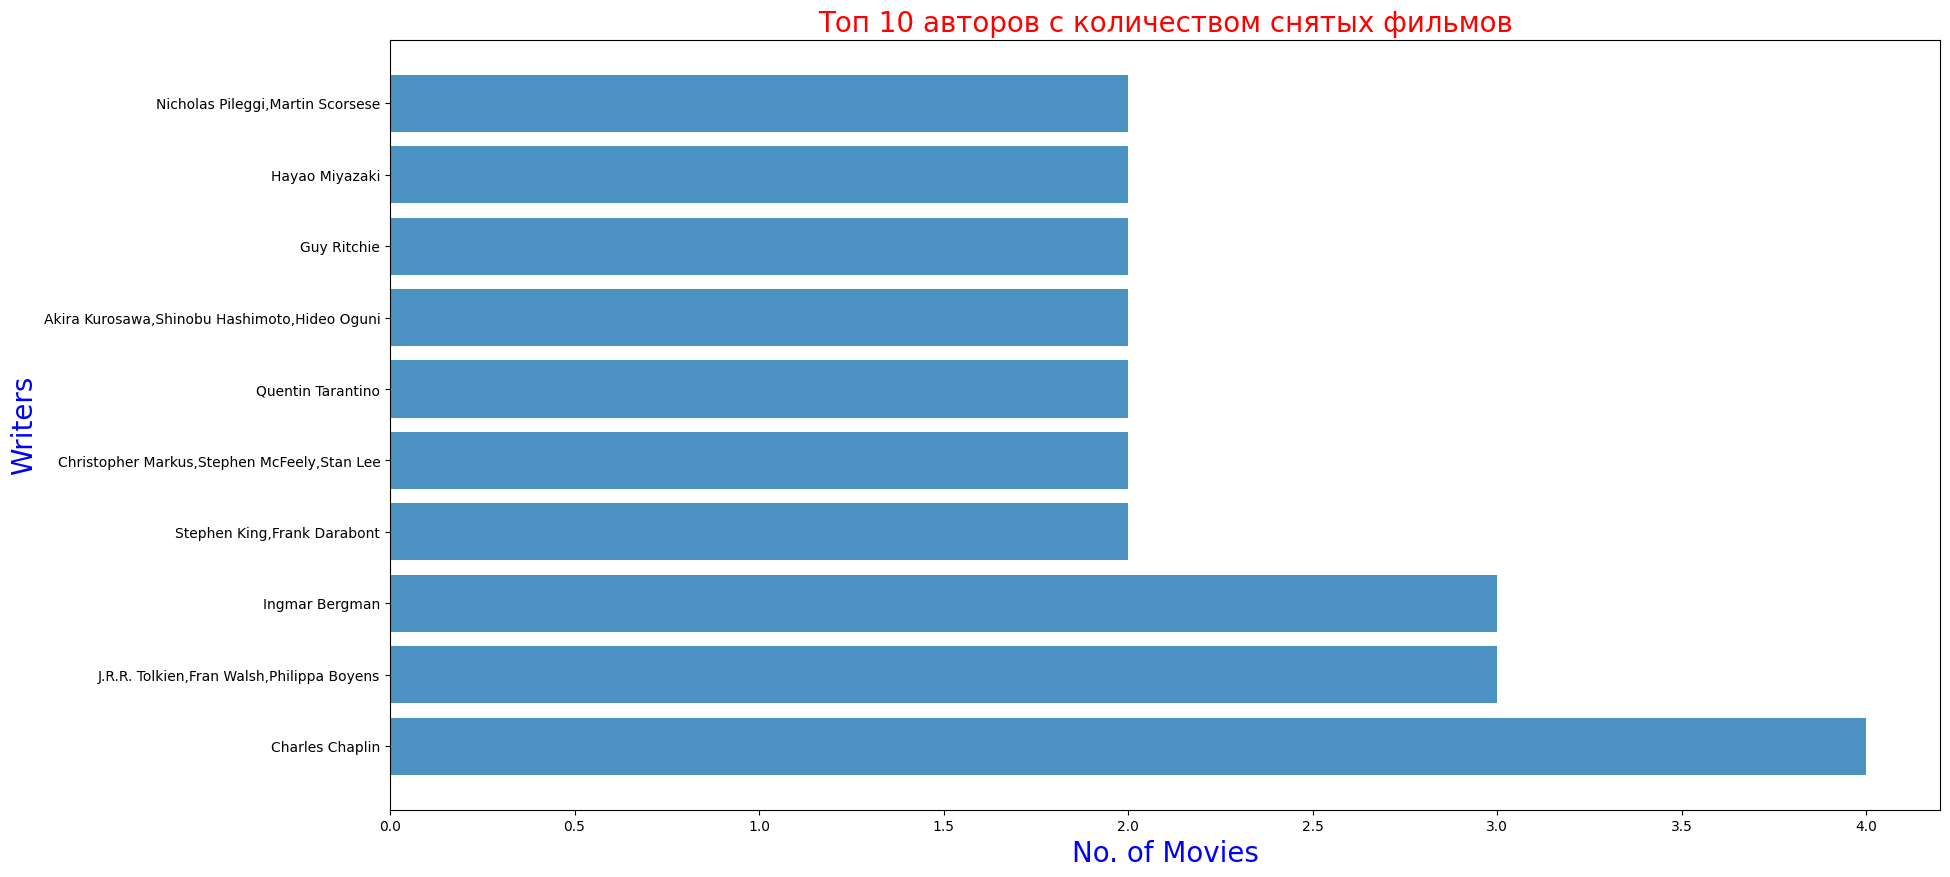

In [ ]:
plt.figure(figsize=(20,10))
x=df["writers"].value_counts().head(10).index
y=df["writers"].value_counts().head(10).values
plt.barh(df["writers"].value_counts().head(10).index,df["writers"].value_counts().head(10).values,alpha=0.8)
plt.title("Топ 10 авторов с количеством снятых фильмов",fontdict={"size":20,"color":"r"})
plt.xlabel("No. of Movies",fontdict={"size":20,"color":"b"})
plt.ylabel("Writers",fontdict={"size":20,"color":"b"})
plt.tick_params(labelsize=10)
plt.show()

In [ ]:
def run_time_cleaner(i):
    if(i != 'Not Available'):
        time = i.split()
        if(len(time) > 1):
            total_minutes = float(time[0].strip('h')) * 60 + float(time[1].strip('m'))
        elif(time[0][-1] == 'h'):
            total_minutes = float(time[0].strip('h')) * 60
        elif(time[0][-1] == 'm'):
            total_minutes = float(time[0].strip('m'))
        else:
            total_minutes = 0

    else:
        total_minutes = 0

    return total_minutes

def retransform_run_time(row):
    row.run_time = run_time_cleaner(row.run_time)
    return row

df = df.apply(retransform_run_time, axis='columns')

In [ ]:
df.run_time = df.run_time.astype(float)
df.run_time.head(10)

0    142.0
1    175.0
2    152.0
3    202.0
4     96.0
5    195.0
6    201.0
7    154.0
8    178.0
9    178.0
Name: run_time, dtype: float64

In [ ]:
def budget_cleaner(i):
    if(i != 'Not Available'):
        cost = i.split()
        if(len(cost) > 1):
            if(cost[0] == 'EM'):
                value = float(cost[1])
            elif(cost[0] == 'RF'):
                value = float(cost[1])
        else:
            value = float(cost[0].strip('$'))

    else:
        value = 0

    return value

def retransform_budget(row):
    row.budget = budget_cleaner(row.budget)
    return row

df = df.apply(retransform_budget, axis='columns')


In [ ]:
df.budget = df.budget.astype(float)
df.budget.head(10)

0     25000000.0
1      6000000.0
2    185000000.0
3     13000000.0
4       350000.0
5     22000000.0
6     94000000.0
7      8000000.0
8     93000000.0
9      1200000.0
Name: budget, dtype: float64

In [ ]:
def box_office_cleaner(i):
    if(i != 'Not Available'):
        cost = i.split()
        value = float(cost[0])

    else:
        value = 0

    return value

def retransform_box_office(row):
    row.box_office = box_office_cleaner(row.box_office)
    return row

df = df.apply(retransform_box_office, axis='columns')

In [ ]:
df.box_office = df.box_office.astype(float)
df.box_office.head(10)

0    2.888450e+07
1    2.503418e+08
2    1.006234e+09
3    4.796192e+07
4    9.550000e+02
5    3.221612e+08
6    1.146458e+09
7    2.139288e+08
8    8.982044e+08
9    2.525389e+07
Name: box_office, dtype: float64

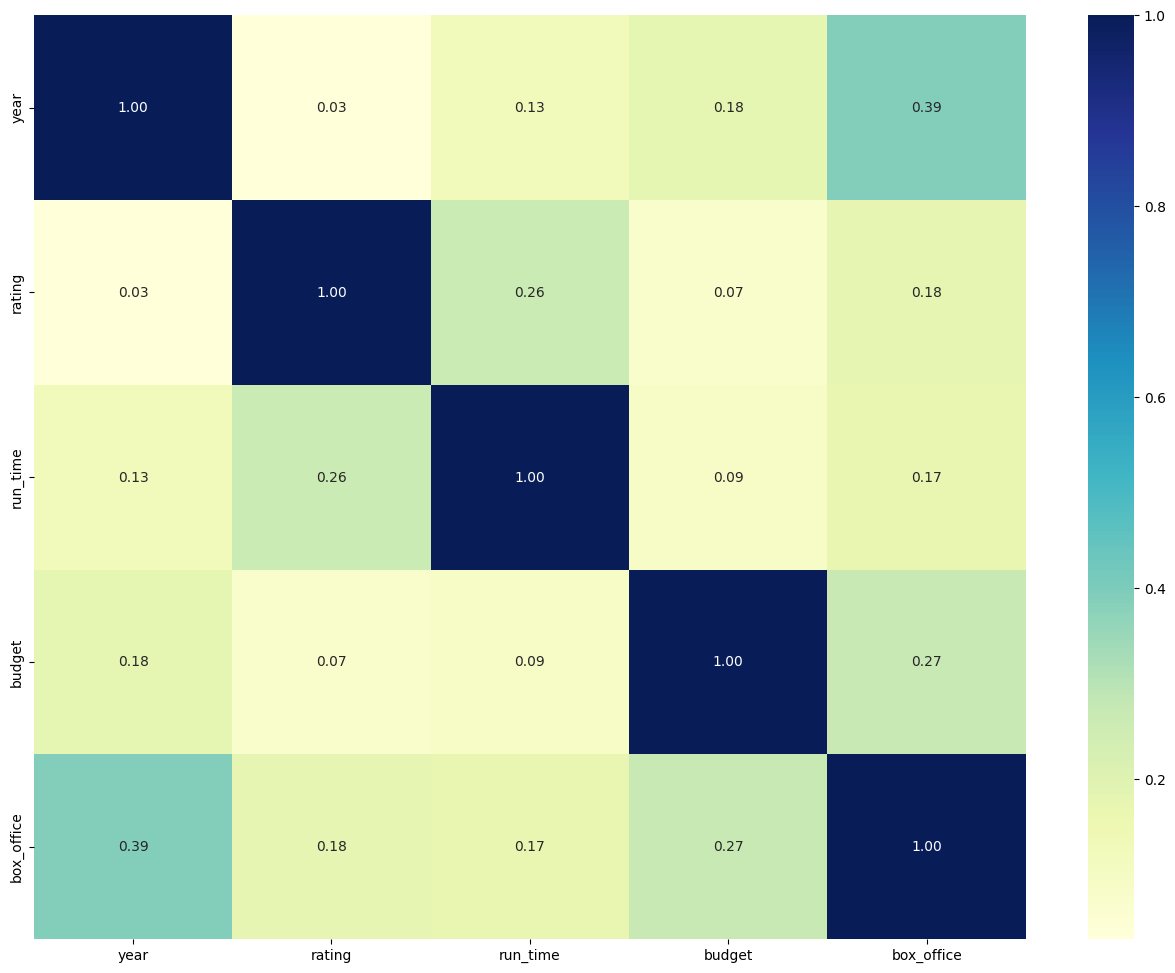

In [ ]:
cols=['year', 'rating', 'run_time', 'budget', 'box_office']
correlations_matrix = df[cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlations_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()